In [1]:
from Geometry3D import *
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
import numpy as np
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Fracture unit normal Vector

Let $P_{1}$, $P_{2}$ and $P_{3}$ be non collinear vectices belonging to the fracture plane:

\begin{aligned}
\ P_{1} &= (P_{1x}, P_{1y}, P_{1z}) \\ \\
\ P_{2} &= (P_{2x}, P_{2y}, P_{2z}) \\ \\
\ P_{3} &= (P_{3x}, P_{3y}, P_{3z}) \\ \\

\end{aligned}

Using these, it is possible then to construct two non- parallel vectors lying on the plane by taking the differences between the coordinates of these points:

\begin{aligned}
\vec{a} &= \vec{P_{1}P_{2}} = (P_{2x} - P_{1x}, P_{2y} - P_{1y}, P_{2z} - P_{1z}) \\ \\
\vec{b} &= \vec{P_{1}P_{3}} = (P_{3x} - P_{1x}, P_{3y} - P_{1y}, P_{3z} - P_{1z}) \\ \\
\vec{a} &= (a_1, a_2, a_3) \\ \\
\vec{b} &= (b_1, b_2, b_3) \\ \\


\end{aligned}

Once the two vectors are constructed, it is possible to compute the cross product between these two to get the normal vector $\vec{n}$ of the plane. The cross product of two vectors, returns a vector which is perpendicular to the two vector used to calculate it. This vector is then convert it to the unit vector by dividing it with its magnitude:


\begin{aligned}

\vec{n} &= \vec{a}  \times  \vec{b} \\ \\

\vec{n} &= \begin{bmatrix}


a_2b_3 - a_3b_2 \\ \\
a_3b_1 - a_1b_3 \\ \\
a_1b_2 - a_2b_1
\end{bmatrix}\\

\hat{n}  &= \frac{\vec{n}} {\|\vec{n}\|}\quad \\
\hat{n} &= \frac{\vec{n}} {\sqrt{\vec{n_{x}}^2 + \vec{n_{y}}^2 + \vec{n_{z}}^2}}\quad
\end{aligned}

In [2]:
#Boundig box 
# define the vertices of the box
a = Point(1,1,1)
b = Point(-1,1,1)
c = Point(-1,-1,1)
d = Point(1,-1,1)
e = Point(1,1,-1)
f = Point(-1,1,-1)
g = Point(-1,-1,-1)
h = Point(1,-1,-1)

# Create the planes constraning the box
face0 = ConvexPolygon((a,d,h,e))
face1 = ConvexPolygon((a,e,f,b))
face2 = ConvexPolygon((c,b,f,g))
face3 = ConvexPolygon((c,g,h,d))
face4 = ConvexPolygon((a,b,c,d))
face5 = ConvexPolygon((e,h,g,f))
bounding_box = ConvexPolyhedron((face0,face1,face2,face3,face4,face5))

# Create intersecting plane  # horizontal plane intersecting the middle of the volume
a1 = Point(-1.5,-1.5,0)
b1 = Point(1.5,-1.5,0)
c1 = Point(1.5,1.5,0)
d1 = Point(-1.5,1.5,0)


# a1 = Point(0,-2,-2)
# b1 = Point(0,-2,2)
# c1 = Point(0,2,2)
# d1 = Point(0,2,-2)
plane = ConvexPolygon((a1,b1,c1, d1))

intersected_area = intersection(bounding_box,plane)

(-2.0, 2.0)

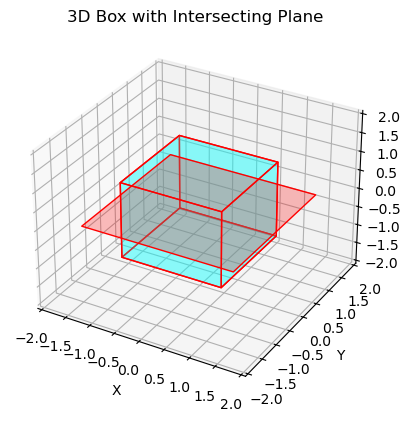

In [3]:
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

# Define the vertices of the box

vertices_box = []
for face in bounding_box.convex_polygons:
    coordinates = [[point.x, point.y, point.z] for point in face.points]
    vertices_box.append(coordinates)

# Define the vertices of the intersecting plane


vertices_plane = [[[point.x, point.y, point.z] for point in plane.points]]
# vertices_plane.append(coordinates_plane)


# Plot the faces of the box
ax.add_collection3d(Poly3DCollection(vertices_box, facecolors='cyan', linewidths=1, edgecolors='r', alpha=.25))
ax.add_collection3d(Poly3DCollection(vertices_plane, facecolors='red', linewidths=1, edgecolors='r', alpha=.25))

vertices_box = np.array(vertices_box)

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Box with Intersecting Plane')

# Set the limits for the axes
ax.set_xlim( [vertices_box[:, :, 0].min()-1, vertices_box[:, :, 0].max()+1])
ax.set_ylim( [vertices_box[:, :, 0].min()-1, vertices_box[:, :, 0].max()+1])
ax.set_zlim( [vertices_box[:, :, 0].min()-1, vertices_box[:, :, 0].max()+1])


# Show the plot


In [5]:
p1,p2, p3 = plane.points[:3]
a = np.array([p2.x - p1.x, p2.y - p1.y, p2.z - p1.z])
b = np.array([p3.x - p1.x, p3.y - p1.y, p3.z - p1.z])
n = np.array([a[1]*b[2] - a[2]*b[1], a[2]*b[0]- a[0]*b[2], a[0]*b[1]-a[1]*b[0]])
n = n /np.sqrt(np.sum(n**2)) #  array([i, j, k]) -> array([0., 0., 1.])

# Permeability tensor

\begin{aligned}
\\k_{ij} &= \lambda \left( F_{kk} \delta_{ij} - F_{ij} \right)
\end{aligned}

Where:
- $\lambda$ is a dimensionless constant increasing with the fracture size with 0 $\leq$ $\lambda$ $\leq$ 1/12
- $\delta_{ij}$ is the Kronecker delta
- $F_{kk} = F_{11} + F_{22} + F_{33}$

\begin{aligned}
F_{ij} = \frac{{1}} {V} \sum_{k=1}^{N} A_{k}T_{k}n_{ik}n_{jk} 
\end{aligned}

Where: 
- ${V}$ Cell volumn
- $A_{k}$ Area of the fracture k
- $T_{k}$ Transmissivity of fracture k
- $n_{ik}n_{jk} $ Components of the unit normal vector of k

The Transmissivity of the fracture ${T}$ can be calculated using the cubic´s law**.

\begin{aligned}
{T} = {b}^3 \frac{\rho g} {12v} 
\end{aligned}

with 

- ${\rho}$ Density
- ${g}$ Acceletarion fue to gravity
- ${v}$ Fluid dynamic viscosity


** source= https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2016WR018806

In [6]:
## transmissivity calculation
aperture = 1 # m 
g = 9.8 # m/s^2
fluid_viscosity = 1.3076 # kg/m/s at 10°C assumed as constant
fluid_density = 999.65 # kg/m3 at 10°C
transmisivity = (aperture**3) * g * fluid_density / (12 * fluid_viscosity)  

# Permeability tensor 
lambda_fracture = 1/12
volume = round(bounding_box.volume(), 1)
area = round(intersected_area.area(), 1)   # intersected area of the plane (fracture) and the cell

F_ij = area*transmisivity*n / volume
F_ij = area*transmisivity*n / volume # array([0, 0 , 312.16764811])

kronecker_delta = np.ones(3)  # array([1., 1., 1.])
F_kk = np.sum(F_ij)  # scalar -> 312.1676481084939

k_ij = lambda_fracture * ((F_kk * kronecker_delta) - F_ij)

# Convert permeability to Hydraulic conductivity

\begin{aligned}
\text{Hydraulic conductivity} (K) = \frac{{Transmisivity  (T)}} {b} 
\end{aligned}

Where:

- ${b}$ is a vector containing the lenght (thickness) along the ${x,y,z}$ axes


In [8]:
# Dimensions of the block in meters
lenght = 2
width = 2
thickness = 2

# Create the hydraulic conductivity tensor
b = np.array([lenght, width, thickness]) # array([2, 2, 2])

K = k_ij / b
K

array([13.00698534, 13.00698534,  0.        ])

In theory, this array above shows the hydraulic conductivity to set in the feflow model. This makes sense, since the plane was in the horizontal direction, i have non- zero components in ${x}$ and ${y}$.

But it raises the questions, i am dividing the transmissivity by the dimensions of the bounding box, assuming the flow direction is parallel to the dimension of the box. but if that is not the case (which it´s the most likely), im not sure how to handle that 